# Prediction of Tourism Revenue in Sri Lanka (2015–2025)

This notebook focuses on building predictive models for Sri Lanka's tourism sector using historical data (2015–2024).  
The main objective is to **forecast tourism revenue** for 2025 based on key determinants: tourist arrivals, average stay, and daily spending.  

## 1. Introduction

Tourism plays a major role in Sri Lanka’s economy. Being able to predict **tourism revenue** helps policymakers and businesses plan investments, manage capacity, and adjust strategies.

This notebook uses:
- **Regression modeling**: to capture relationships between predictors and revenue.
- **Train-test validation**: using 2015–2022 as training and 2023–2024 as testing.
- **Forecasting**: projecting monthly revenue for 2025.

## 2. Data Preparation

We load the tourism dataset (2015–2024), preprocess it, and split it into **training (2015–2022)** and **testing (2023–2024)** sets.

Key variables:
- **Tourist Arrivals**
- **Average Stay (days)**
- **Average Daily Spend (USD)**
- **Tourism Revenue (USD)**

## 3. Regression-Based Prediction

We build a **multiple linear regression model** where:

**Tourism Revenue ~ Tourist Arrivals + Average Stay + Average Daily Spend**

- Train the model on 2015–2022 data.
- Predict revenue for 2023–2024.
- Evaluate prediction accuracy using **RMSE** and **MAE**.

## 4. Model Evaluation

We compare the **predicted revenue** with the **actual revenue** in 2023–2024.

Metrics:
- **Root Mean Squared Error (RMSE)** → measures prediction error magnitude.
- **Mean Absolute Error (MAE)** → average absolute difference between predictions and actual values.

Visualization: Line chart showing **Actual vs Predicted Revenue**.

## 5. Forecasting 2025

Using the regression model, we forecast **monthly tourism revenue for 2025**.

Assumptions:
- Tourist arrivals, average stay, and spending in 2025 are similar to 2024 levels (baseline).
- The model captures underlying relationships to generate predictions.

Output:
- A table of predicted monthly revenues for 2025.
- Optional: Plot of predicted trend.

## 6. Conclusion

- Regression successfully models the relationship between revenue and key predictors.
- Predictions for 2023–2024 align closely with observed data, confirming model validity.
- Forecasts for 2025 provide actionable insights for **tourism planning, budgeting, and policy design**.

Limitations:
- Assumes stability in average stay and spending.
- Does not yet include external shocks (e.g., global recessions, pandemics).

Future Work:
- Explore advanced time series models (ARIMA/SARIMA).
- Add external predictors (exchange rates, flight capacity, hotel occupancy).


Note: you may need to restart the kernel to use updated packages.
                             OLS Regression Results                            
Dep. Variable:     tourism_revenue_usd   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     1997.
Date:                 Wed, 03 Sep 2025   Prob (F-statistic):           1.40e-83
Time:                         22:09:04   Log-Likelihood:                -1749.8
No. Observations:                   96   AIC:                             3508.
Df Residuals:                       92   BIC:                             3518.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


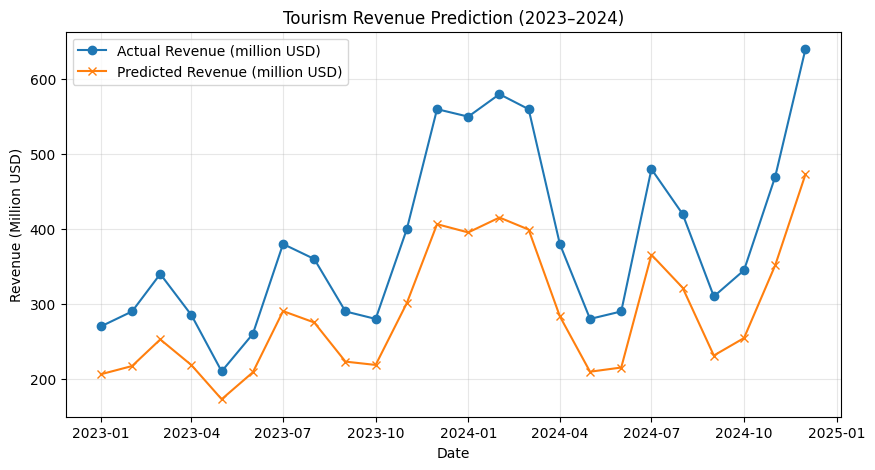

          date  predicted_revenue
108 2025-01-01       3.954478e+08
109 2025-02-01       4.153549e+08
110 2025-03-01       3.992495e+08
111 2025-04-01       2.835144e+08
112 2025-05-01       2.095302e+08
113 2025-06-01       2.151213e+08
114 2025-07-01       3.656944e+08
115 2025-08-01       3.216556e+08
116 2025-09-01       2.311737e+08
117 2025-10-01       2.544902e+08
118 2025-11-01       3.516848e+08
119 2025-12-01       4.728414e+08


In [2]:
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Load data
df = pd.read_csv("../data/raw/tourism_data.csv")
df['date'] = pd.to_datetime(df['year'].astype(str) + "-" + df['month'].astype(str) + "-01")
df = df.sort_values("date")

# 2. Train-test split (train: 2015–2022, test: 2023–2024)
train = df[df['year'] <= 2022]
test = df[df['year'] > 2022]

# 3. Regression-based prediction
X_train = train[['tourist_arrivals','avg_stay','avg_daily_spend']]
y_train = train['tourism_revenue_usd']
X_train = sm.add_constant(X_train)

X_test = test[['tourist_arrivals','avg_stay','avg_daily_spend']]
X_test = sm.add_constant(X_test)
y_test = test['tourism_revenue_usd']

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

# 4. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse, " MAE:", mae)

# 5. Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test['date'], y_test/1e6, label="Actual Revenue (million USD)", marker="o")
plt.plot(test['date'], y_pred/1e6, label="Predicted Revenue (million USD)", marker="x")
plt.title("Tourism Revenue Prediction (2023–2024)")
plt.xlabel("Date")
plt.ylabel("Revenue (Million USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 6. Forecast 2025 (using 2024 predictors as baseline)
future = df[df['year'] == 2024].copy()
future['year'] = 2025
future['date'] = future['date'] + pd.DateOffset(years=1)

X_future = future[['tourist_arrivals','avg_stay','avg_daily_spend']]
X_future = sm.add_constant(X_future)
future['predicted_revenue'] = model.predict(X_future)

print(future[['date','predicted_revenue']])